In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
a = pd.read_csv('Real estate.csv')
a.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
a.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [4]:
a.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

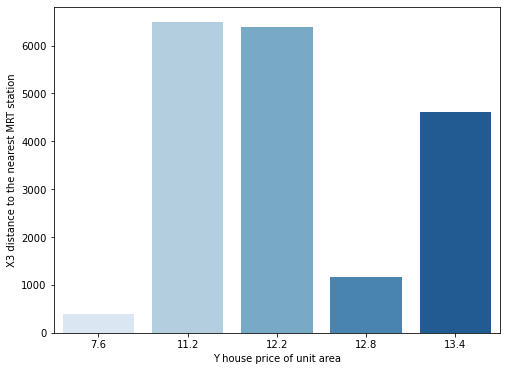

In [8]:
price =a['Y house price of unit area'].groupby(a['X3 distance to the nearest MRT station']).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(x=price.head(), y=price.head().index, palette='Blues')

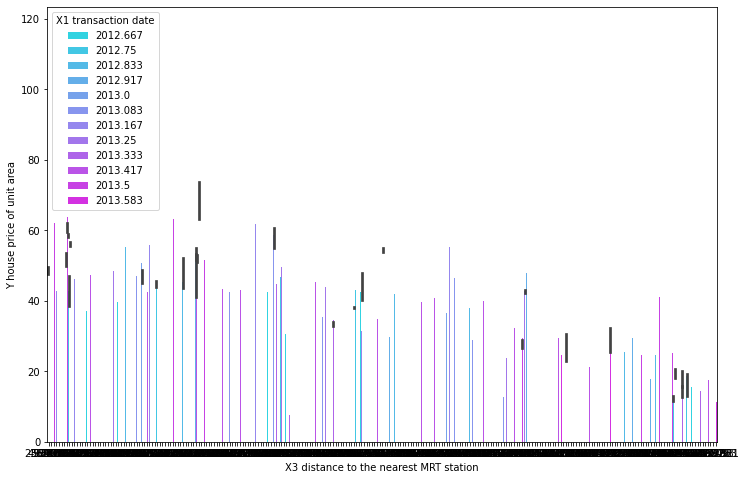

In [10]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='X3 distance to the nearest MRT station', y='Y house price of unit area', hue='X1 transaction date', 
data=a, palette='cool')

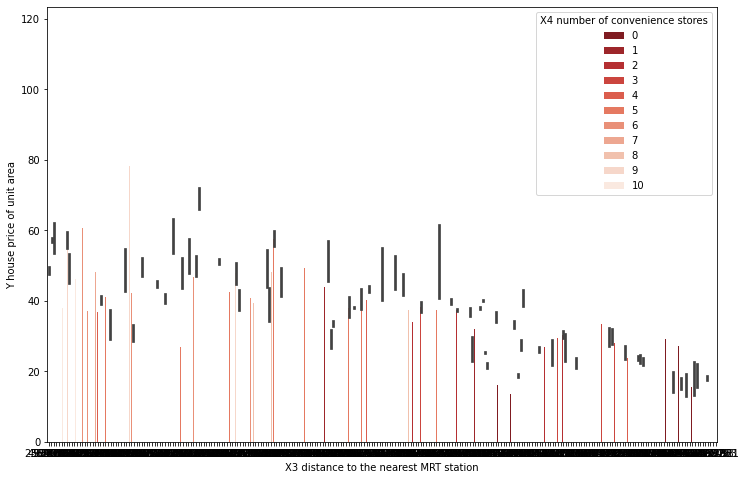

In [12]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='X3 distance to the nearest MRT station', y='Y house price of unit area', hue='X4 number of convenience stores', 
data=a, palette='Reds_r')

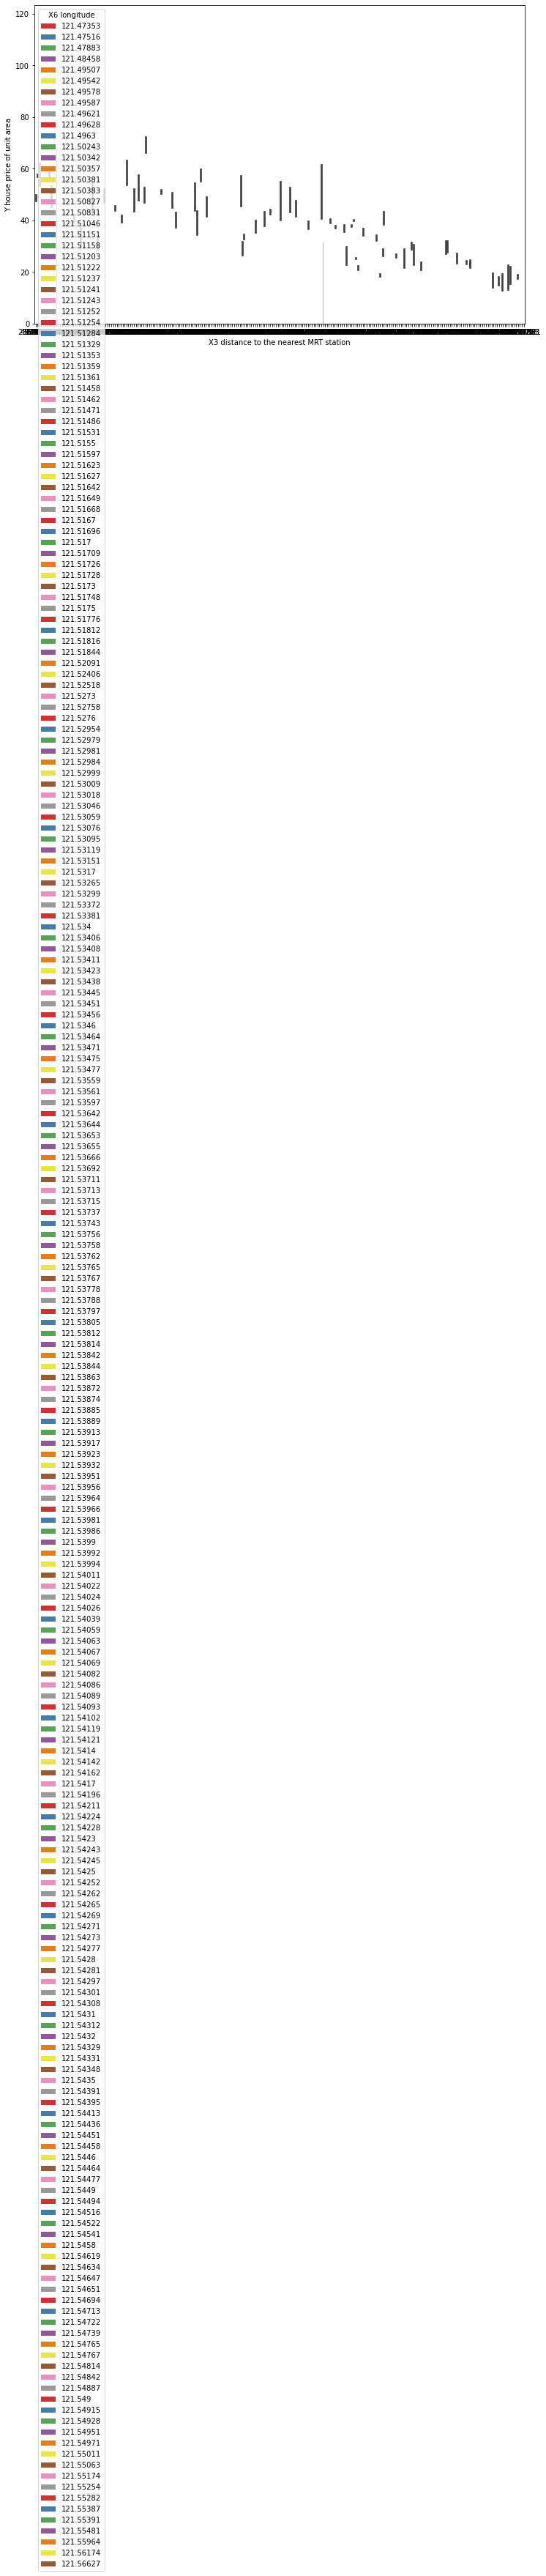

In [15]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='X3 distance to the nearest MRT station', y='Y house price of unit area', hue='X6 longitude', 
data=a, palette='Set1')

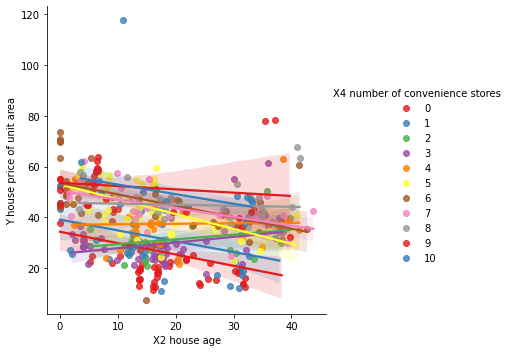

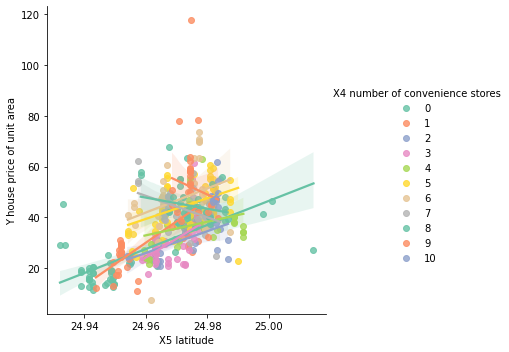

In [17]:
ax = sns.lmplot(x='X2 house age', y='Y house price of unit area', hue='X4 number of convenience stores', 
                data=a, palette='Set1')
ax = sns.lmplot(x='X5 latitude', y='Y house price of unit area', hue='X4 number of convenience stores', 
                data=a, palette='Set2')

In [20]:
a[['X1_transaction_date', 'X4_number_of_convenience_stores', 'X3_distance_to_the_nearest_MRT_station']] = a[['X1 transaction date', 'X4 number of convenience stores', 'X3 distance to the nearest MRT station']].astype('category')

In [23]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(a.X1_transaction_date.drop_duplicates())
a.X1_transaction_date = label.transform(a.X1_transaction_date)
label.fit(a.X4_number_of_convenience_stores.drop_duplicates())
a.X4_number_of_convenience_stores = label.transform(a.X4_number_of_convenience_stores)
label.fit(a.X3_distance_to_the_nearest_MRT_station.drop_duplicates())
a.X3_distance_to_the_nearest_MRT_station = label.transform(a.X3_distance_to_the_nearest_MRT_station)

In [24]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [27]:
x = a.drop(['Y house price of unit area'], axis = 1)
y = a['Y house price of unit area']
x_train, x_test, y_train, y_test = holdout(x,y,test_size=0.2, random_state=0)

In [28]:
linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression()

In [29]:
y_pred = linear_reg.predict(x_test)

In [30]:
R2 = metrics.r2_score(y_test, y_pred)
rmse = (np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2 : {0:.3f}'.format(R2))
print('RMSE : {0:.3f}'.format(rmse))

R2 : 0.763
RMSE : 6.418


In [31]:
importance = linear_reg.coef_
variables = ['X1_transaction_date' , 'X2_house_age,X3_distance_to_the_nearest_MRT_station' , 'X4_number_of_convenience_stores' , 'X5_latitude' , 'X6_longitude' , 'Y_house_price_of_unit_area']
for i, v in zip(variables, importance):
    print('Feature: %s, Score ==> %.5f' % (i,v))

Feature: X1_transaction_date, Score ==> -0.00408
Feature: X2_house_age,X3_distance_to_the_nearest_MRT_station, Score ==> -2311.54923
Feature: X4_number_of_convenience_stores, Score ==> -0.22166
Feature: X5_latitude, Score ==> 0.00058
Feature: X6_longitude, Score ==> 0.14795
Feature: Y_house_price_of_unit_area, Score ==> 305.05718
